In [3]:
from pymongo import MongoClient
import pandas as pd  
import numpy as np 
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from nltk.corpus import stopwords

client = MongoClient('localhost', 27017)
db = client['']

tweets = pd.DataFrame(list(db[''].find()))

In [4]:
data = pd.DataFrame(columns=['Tweets','Id','len','Hashtags'])
data['Tweets'] = tweets['text']
data['Id'] = tweets['_id']
data['len']  = np.array([len(tweet) for tweet in data['Tweets']])
user = list()
for i in range(0,len(tweets)):
    user.append(tweets['user'][i]['name'])
data['user'] = np.array(user)

for i in range(0,len(tweets)):
    hashtags= list()
    if (len(tweets['entities'][i]['hashtags'])==0):
        hashtags.append('NaN')
    else:
        for n in range(len(tweets['entities'][i]['hashtags'])):
            hashtags.append(tweets['entities'][i]['hashtags'][n]['text'])
            data.at[i, 'Hashtags'] = hashtags          

In [5]:
data.head()

,Tweets,Id,len,Hashtags,user
0,ciao ragazzi dopo tanto tempo torno più forte ...,5c7167e33f84f6710c225cb5,138,NaN,IpronosticidelMister
1,#liberidichiedere secondo voi con tutti i nomi...,5c7167e33f84f6710c225cb6,132,[liberidichiedere],IpronosticidelMister
2,Ciao Followers come state? Pubblicata su fb tu...,5c7167e33f84f6710c225cb7,77,NaN,IpronosticidelMister
3,Ciao Cari Followers ecco a voi cosa a giocato ...,5c7167e33f84f6710c225cb8,79,NaN,IpronosticidelMister
4,Ciao Followers ecco la Singola del Mister del ...,5c7167e33f84f6710c225cb9,76,NaN,IpronosticidelMister


In [6]:
filtered_data = data.dropna()


In [7]:
n = filtered_data.reset_index(drop=True)
n.head(20)



,Tweets,Id,len,Hashtags,user
0,#liberidichiedere secondo voi con tutti i nomi...,5c7167e33f84f6710c225cb6,132,[liberidichiedere],IpronosticidelMister
1,Adelaide United vs Sydney FC 1-0. 19' Dario Vi...,5c7167e33f84f6710c225d48,87,[FotMob],IpronosticidelMister
2,Sint-Niklaas vs Oostende 0-1. 35' Jamaique Van...,5c7167e33f84f6710c225d65,80,[FotMob],IpronosticidelMister
3,Sint-Niklaas vs Oostende 0-1. 36' &lt;TBD&gt; ...,5c7167e33f84f6710c225d66,74,[FotMob],IpronosticidelMister
4,Kidderminster vs Dartford 2-1. 32' Cheyenne Du...,5c7167e33f84f6710c225d67,85,[FotMob],IpronosticidelMister
5,Kidderminster vs Dartford 3-1. 69' Jamille Mat...,5c7167e33f84f6710c225d69,81,[FotMob],IpronosticidelMister
6,RT @NonRompetemi: @IpronodelMister Sei un gran...,5c7167e33f84f6710c225d78,116,[RESPECT],IpronosticidelMister
7,RT @fablibi: #FF @IpronodelMister incontournab...,5c7167e33f84f6710c225d7a,91,[FF],IpronosticidelMister
8,RT @RCDEspanyol: Final del partido en Cornellà...,5c7167e33f84f6710c225d7b,138,"[RCDE, ensensortirem]",IpronosticidelMister
9,Goolasso de Simao! 1-0 Espanyolll!\n\n#Forza...,5c7167e33f84f6710c225d7e,99,[Forza],IpronosticidelMister


In [8]:
n['liststring'] = [','.join(map(str, l)) for l in n.Hashtags]
n.head(20)

,Tweets,Id,len,Hashtags,user,liststring
0,#liberidichiedere secondo voi con tutti i nomi...,5c7167e33f84f6710c225cb6,132,[liberidichiedere],IpronosticidelMister,liberidichiedere
1,Adelaide United vs Sydney FC 1-0. 19' Dario Vi...,5c7167e33f84f6710c225d48,87,[FotMob],IpronosticidelMister,FotMob
2,Sint-Niklaas vs Oostende 0-1. 35' Jamaique Van...,5c7167e33f84f6710c225d65,80,[FotMob],IpronosticidelMister,FotMob
3,Sint-Niklaas vs Oostende 0-1. 36' &lt;TBD&gt; ...,5c7167e33f84f6710c225d66,74,[FotMob],IpronosticidelMister,FotMob
4,Kidderminster vs Dartford 2-1. 32' Cheyenne Du...,5c7167e33f84f6710c225d67,85,[FotMob],IpronosticidelMister,FotMob
5,Kidderminster vs Dartford 3-1. 69' Jamille Mat...,5c7167e33f84f6710c225d69,81,[FotMob],IpronosticidelMister,FotMob
6,RT @NonRompetemi: @IpronodelMister Sei un gran...,5c7167e33f84f6710c225d78,116,[RESPECT],IpronosticidelMister,RESPECT
7,RT @fablibi: #FF @IpronodelMister incontournab...,5c7167e33f84f6710c225d7a,91,[FF],IpronosticidelMister,FF
8,RT @RCDEspanyol: Final del partido en Cornellà...,5c7167e33f84f6710c225d7b,138,"[RCDE, ensensortirem]",IpronosticidelMister,"RCDE,ensensortirem"
9,Goolasso de Simao! 1-0 Espanyolll!\n\n#Forza...,5c7167e33f84f6710c225d7e,99,[Forza],IpronosticidelMister,Forza


In [9]:
vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,3))

X = vectorizer.fit_transform(n.liststring)

true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster :", i),
    for ind in order_centroids[i, :3]:
        print(' ', terms[ind]),
    print

Top terms per cluster:
Cluster : 0
  orientamento
  matricole
  orientamento matricole
Cluster : 1
  sportitaliamercato
  stealtheshow
  justdoit
Cluster : 2
  asroma
  madeinitalytour
  madeinitalyilfilm
Cluster : 3
  sanremo2019
  sanremo2019 festivaldisanremo2019
  achillelauro sanremo2019
Cluster : 4
  iamcallo
  f1
  leicaambassador
Cluster : 5
  ideasportpallacanestromilano
  basketballneverstops
  ideasportpallacanestromilano basketballneverstops
Cluster : 6
  romaporto
  ucl
  asroma romaporto
Cluster : 7
  bruttoestonato
  brokenspeakers
  labarbadellamagliana
Cluster : 8
  midrep2018
  midterm
  midterm midrep2018
Cluster : 9
  genova
  genova acquariodigenova
  acquariodigenova


Counter({2: 10396, 4: 565, 1: 255, 7: 146, 6: 123, 0: 41, 9: 17, 3: 15, 8: 13, 5: 12})
Silouette_score:  0.01217640144660992


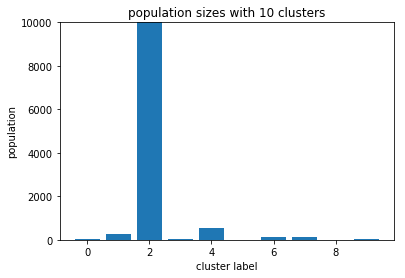

In [11]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import collections
plt.bar(range(len(set(model.labels_))), np.bincount(model.labels_))

plt.ylabel('population')
plt.xlabel('cluster label')
plt.title('population sizes with {} clusters'.format(true_k));

# truncate y axis to see the rest better
plt.ylim(0,10000);


print (collections.Counter(model.labels_))
print ('Silouette_score: ',silhouette_score(X, model.labels_))